In [2]:
from scipy.integrate import solve_ivp
import numpy as np

In [3]:
def ode_func(t, y, n, beta):
    return (2 * (1 - y) * ((n-1)*y + 1)) / (np.exp(beta * (1-y)) + (n-1))

def compute_beta(y0=0, n=128, epsilon=0.001, T=30, n_T=300, b_span=(0.1, 9), n_b=50):
    t_span = (0, T)

    t_eval = np.linspace(t_span[0], t_span[1], n_T)
    b_eval = np.linspace(b_span[0], b_span[1], n_b)

    beta_t = np.zeros_like(t_eval)

    for i, t_val in enumerate(t_eval):
        def objective(beta_val):
            sol = solve_ivp(lambda t, y: ode_func(t, y, n, beta_val), t_span, [y0], t_eval=t_eval)
            return sol.y

        if len([beta for beta in b_eval if objective(beta)[0][i] >= 1 - epsilon])>0:
            beta_t[i] = max([beta for beta in b_eval if objective(beta)[0][i] >= 1 - epsilon])

    return beta_t

In [4]:
betas = compute_beta()

/var/folders/4n/p4zjp9g17rx7p18klqb5zmvc0000gn/T/ipykernel_70609/2898159158.py:2: RuntimeWarning: overflow encountered in exp
  return (2 * (1 - y) * ((n-1)*y + 1)) / (np.exp(beta * (1-y)) + (n-1))


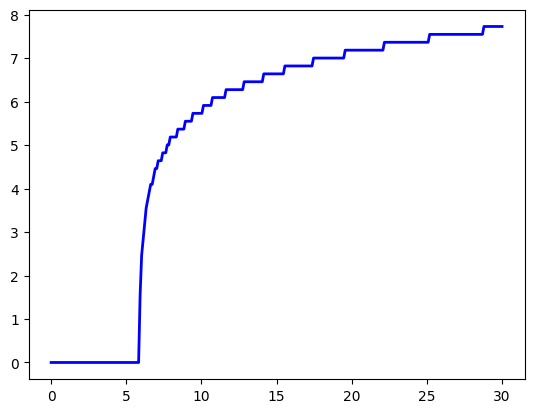

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 30, 300), np.maximum(betas, 0), color='blue', linewidth=2)